In [7]:
import pandas as pd, tensorflow as tf
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv("./dataset/GS_2006-01-01_to_2018-01-01.csv")

In [10]:
df.head()

Date    Open    High     Low   Close   Volume Name
0  2006-01-03  126.70  129.44  124.23  128.87  6188700   GS
1  2006-01-04  127.35  128.91  126.38  127.09  4862000   GS
2  2006-01-05  126.00  127.32  125.61  127.04  3717600   GS
3  2006-01-06  127.29  129.25  127.29  128.84  4319600   GS
4  2006-01-09  128.50  130.62  128.00  130.39  4723500   GS

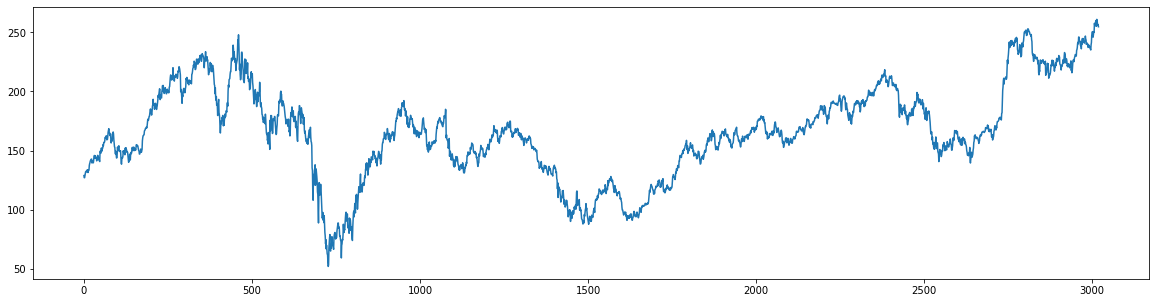

In [16]:
fig, ax = plt.subplots(figsize = (20,5))
plt.plot(df.Close)

In [18]:
df.Close.shape

(3020,)

In [118]:
import numpy as np

In [36]:
def rolling_window(a, window, step_size):
    shape = a.shape[:-1] + (a.shape[-1] - window + 1 - step_size + 1, window)
    strides = a.strides + (a.strides[-1] * step_size,)
    return np.lib.stride_tricks.as_strided(a, shape=shape, strides=strides)

In [121]:
# Ejemplo
rango = np.arange(10)
rolling_window(rango, 5, 1)

array([[0, 1, 2, 3, 4],
       [1, 2, 3, 4, 5],
       [2, 3, 4, 5, 6],
       [3, 4, 5, 6, 7],
       [4, 5, 6, 7, 8],
       [5, 6, 7, 8, 9]])

In [127]:
time_series = df.Close.values.T
def ts_to_rolling_df(time_series, window):
    ts_rolling = rolling_window(time_series, window, 1)
    target = ts_rolling[:,-1]/ts_rolling[:,-2]
    ts_dataset = np.column_stack((ts_rolling,target))
    df = pd.DataFrame(ts_dataset)
    df["Target"] = df[df.columns[-1]]
    df = df.drop(columns = df.columns[-2])
    return df

In [128]:
data = ts_to_rolling_df(df.Close.values.T, 30)
data.head()

0       1       2       3       4       5       6       7       8  \
0  128.87  127.09  127.04  128.84  130.39  132.03  131.97  132.25  133.26   
1  127.09  127.04  128.84  130.39  132.03  131.97  132.25  133.26  132.59   
2  127.04  128.84  130.39  132.03  131.97  132.25  133.26  132.59  131.85   
3  128.84  130.39  132.03  131.97  132.25  133.26  132.59  131.85  133.82   
4  130.39  132.03  131.97  132.25  133.26  132.59  131.85  133.82  131.44   

        9  ...      21      22      23      24      25      26      27  \
0  132.59  ...  142.52  142.74  142.82  139.48  141.14  140.85  140.81   
1  131.85  ...  142.74  142.82  139.48  141.14  140.85  140.81  139.65   
2  133.82  ...  142.82  139.48  141.14  140.85  140.81  139.65  141.78   
3  131.44  ...  139.48  141.14  140.85  140.81  139.65  141.78  145.14   
4  132.87  ...  141.14  140.85  140.81  139.65  141.78  145.14  145.90   

       28      29    Target  
0  139.65  141.78  1.015252  
1  141.78  145.14  1.023699  
2  145.14  145.90  1.005236  
3  145.90  145.54  0.997533  
4  145.54  143.45  0.985640  

[5 rows x 31 columns]

In [140]:
from sklearn.model_selection import train_test_split
features = data.drop(columns = "Target")
target = data["Target"]

X_train, X_test, y_train, y_test = series_split(features, target, test_size=0.33)

In [141]:
def series_split(features, target, test_size):
    total = features.shape[0]
    n = int(total*(1 - test_size))
    return features[:n], features[n:], target[:n], target[n:]

In [164]:
X_test.values.shape

(988, 30)

In [188]:
X_train, X_test, y_train, y_test = series_split(features, target, test_size=0.33)
X_train = X_train.values.reshape((2003,30,1))
X_test = X_test.values.reshape((988,30,1))
y_train = y_train.values.reshape((2003,1))
y_test = y_test.values.reshape((988,1))

In [179]:
X_train.values.shape

(2003, 30)

In [ ]:
#https://medium.com/@dclengacher/keras-lstm-recurrent-neural-networks-c1f5febde03d

In [192]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import Embedding
from keras.layers import Conv1D, GlobalAveragePooling1D, MaxPooling1D
#https://stats.stackexchange.com/questions/264546/difference-between-samples-time-steps-and-features-in-neural-network

seq_length = 30
kernel = 8

model = Sequential()
model.add(Conv1D(32, kernel_size= kernel, activation='relu', input_shape=(seq_length,1)))
model.add(Conv1D(64, kernel_size= kernel, activation='relu'))
#model.add(MaxPooling1D(kernel))
model.add(Conv1D(64, kernel_size= kernel, activation='relu'))
model.add(Conv1D(128, kernel_size= kernel, activation='relu'))
model.add(GlobalAveragePooling1D())
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

model.fit(X_train, y_train, batch_size=16, epochs=10)


Epoch 1/10
2003/2003 [==============================] - 1s 307us/step - loss: 0.1583 - accuracy: 9.9850e-04
Epoch 2/10
2003/2003 [==============================] - 0s 174us/step - loss: 0.3850 - accuracy: 9.9850e-04
Epoch 3/10
2003/2003 [==============================] - 0s 160us/step - loss: 0.1768 - accuracy: 9.9850e-04
Epoch 4/10
2003/2003 [==============================] - 0s 158us/step - loss: 0.3228 - accuracy: 9.9850e-04
Epoch 5/10
2003/2003 [==============================] - 0s 156us/step - loss: 0.4141 - accuracy: 9.9850e-04
Epoch 6/10
2003/2003 [==============================] - 0s 168us/step - loss: 0.4946 - accuracy: 9.9850e-04
Epoch 7/10
2003/2003 [==============================] - 0s 158us/step - loss: 1.4318 - accuracy: 9.9850e-04
Epoch 8/10
2003/2003 [==============================] - 0s 156us/step - loss: -0.3340 - accuracy: 9.9850e-04
Epoch 9/10
2003/2003 [==============================] - 1s 350us/step - loss: 1.6364 - accuracy: 9.9850e-04
Epoch 10/10
988/988 [======

In [198]:
score = model.evaluate(X_test, y_test, batch_size=16)
print(score)

988/988 [==============================] - 0s 80us/step
[-194906207.4261293, 0.0020242915488779545]


# Example with silly data

In [169]:
#Load Packages
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Activation
#Generate 2 sets of X variables
#LSTMs have unique 3-dimensional input requirements 
seq_length=5
X =[[i+j for j in range(seq_length)] for i in range(100)]
X_simple =[[i for i in range(4,104)]]
X =np.array(X)
X_simple=np.array(X_simple)

In [197]:
print(X[:2])

[[[0]
  [1]
  [2]
  [3]
  [4]]

 [[1]
  [2]
  [3]
  [4]
  [5]]]


In [183]:
y =[[ i+(i-1)*.5+(i-2)*.2+(i-3)*.1 for i in range(4,104)]]
y =np.array(y)
X_simple=X_simple.reshape((100,1))
X=X.reshape((100,5,1))
y=y.reshape((100,1))

100/100 [==============================] - 0s 168us/step
Accurracy: 0.1899999976158142


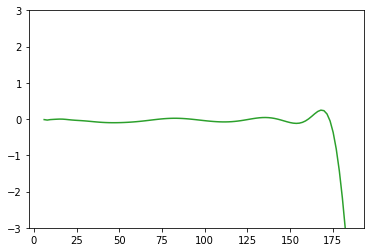

In [187]:
model = Sequential()
model.add(LSTM(8,input_shape=(5,1),return_sequences=False))#True = many to many
model.add(Dense(2,kernel_initializer="normal",activation="linear"))
model.add(Dense(1,kernel_initializer="normal",activation="linear"))
model.compile(loss="mse",optimizer ="adam",metrics=["accuracy"])
model.fit(X,y,epochs=2000,batch_size=5,validation_split=0.05,verbose=0);
scores = model.evaluate(X,y,verbose=1,batch_size=5)
print("Accurracy: {}".format(scores[1])) 
import matplotlib.pyplot as plt
predict=model.predict(X)
plt.plot(y, predict-y, 'C2')
plt.ylim(ymax = 3, ymin = -3)
plt.show()